In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing Dataset

In [4]:

anime_data=pd.read_csv('Anime_2020.csv')


print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())


The shape of the  data is (row, column):(18495, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff 

In [5]:
anime_data.head

<bound method NDFrame.head of         Rank                                               Name  \
0          1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1          2                     Fruits Basket the Final Season   
2          3                                    Mo Dao Zu Shi 3   
3          4                   Fullmetal Alchemist: Brotherhood   
4          5                Attack on Titan 3rd Season: Part II   
...      ...                                                ...   
18490  18491  Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...   
18491  18492                      Yi Tang Juchang: Sanguo Yanyi   
18492  18493          Fenghuang Ji Xiang Yu Qingming Shanghe Tu   
18493  18494                      Chengshi Jiyi Wo Men de Jieri   
18494  18495  Heisei Inu Monogatari Bow: Genshi Inu Monogata...   

                                         Japanese_name   Type  Episodes  \
0                        Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1              

In [6]:
# reference : https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering

nonull_anime=anime_data.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

KeyError: 'genre'

In [7]:
# User should rate atleast 400 animes
n_ratings = rating_data['user_id'].value_counts()
rating_data = rating_data[rating_data['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
print('Users who rated more than 400 animes are :',len(rating_data))

Users who rated more than 400 animes are : 1945657


In [8]:
 
# Removing Duplicated Rows from the data

duplicates = rating_data.duplicated()
if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_data = rating_data[~duplicates]

print('> {} duplicates'.format(rating_data.duplicated().sum()))

> 0 duplicates


Text(0, 0.5, 'User Rating count')

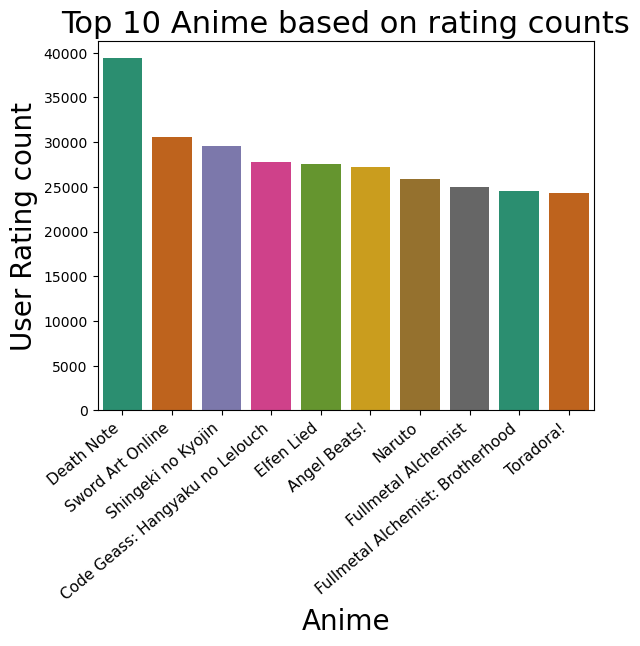

In [9]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)


In [10]:
## Which anime has the highest ratings

anime_data[['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>500000')[:5]

,name,rating,members,type
1,Fullmetal Alchemist: Brotherhood,9.26,793665,TV
3,Steins;Gate,9.17,673572,TV
13,Code Geass: Hangyaku no Lelouch R2,8.98,572888,TV
19,Code Geass: Hangyaku no Lelouch,8.83,715151,TV
23,One Punch Man,8.82,552458,TV


In [11]:
## Highest rated anime movies

anime_data[anime_data['type'] == 'Movie'][['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>200000')[:5]

,name,rating,members,type
0,Kimi no Na wa.,9.37,200630,Movie
15,Sen to Chihiro no Kamikakushi,8.93,466254,Movie
18,Ookami Kodomo no Ame to Yuki,8.84,226193,Movie
24,Mononoke Hime,8.81,339556,Movie
25,Suzumiya Haruhi no Shoushitsu,8.81,240297,Movie


In [12]:
## Content based recommendation system

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

genres_str = anime_data['genre'].str.split(',').astype(str)

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0)
tfidf_matrix = tfidf.fit_transform(genres_str)

tfidf_matrix.shape
# tfidf.get_feature_names()
(12017, 5569)
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(anime_data.index, index=anime_data['name'])

def genre_recommendations(title, similarity=False):
    
    if similarity == False:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        anime_indices = [i[0] for i in sim_scores]
        
        return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                             'Type': anime_data['type'].iloc[anime_indices].values})
    
    elif similarity == True:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        anime_indices = [i[0] for i in sim_scores]
        similarity_ = [i[1] for i in sim_scores]
        
        return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                             'similarity': similarity_,
                             'Type': anime_data['type'].iloc[anime_indices].values})

In [ ]:
## Based on cosine similarity

In [24]:
indices = pd.Series(anime_data.index, index=anime_data['name'])

def genre_recommendations(title, highest_rating=False, similarity=False):
    
    if highest_rating == False:
        if similarity == False:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values})
        
    elif highest_rating == True:
        if similarity == False:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)
    
        elif similarity == True:
        
            idx = indices[title]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]
        
            anime_indices = [i[0] for i in sim_scores]
            similarity_ = [i[1] for i in sim_scores]
        
            result_df = pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Similarity': similarity_,
                                 'Type': anime_data['type'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})
            
            return result_df.sort_values('Rating', ascending=False)


In [31]:
genre_recommendations('Noragami', highest_rating=True, similarity=True)

,Anime name,Similarity,Type,Rating
5,JoJo no Kimyou na Bouken (TV),0.758463,TV,8.51
0,Noragami,1.000000,TV,8.17
1,Bleach Movie 2: The DiamondDust Rebellion - Mo...,1.000000,Movie,7.60
2,Yuu☆Yuu☆Hakusho: Eizou Hakusho,1.000000,OVA,7.48
6,Gensoumaden Saiyuuki Movie: Requiem - Erabarez...,0.733308,Movie,7.48
7,Konjiki no Gash Bell!!: 101 Banme no Mamono,0.733308,Movie,7.41
8,Gensoumaden Saiyuuki OVA,0.733308,OVA,7.31
9,Konjiki no Gash Bell!!: Mecha Vulkan no Raishuu,0.733308,Movie,7.24
3,Tokyo Juushouden,1.000000,OVA,5.67
4,Tokyo Juushouden: Fuuma Gogyou Denshou,1.000000,OVA,5.58
